In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

rawdata = pd.read_csv('https://raw.githubusercontent.com/yuezheli/BankChurnerPred/main/BankChurners.csv', header = 0)

rawdata.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
## analysis on Exitsing and Attrited customers

print(len(rawdata))

print(len( rawdata[rawdata['Attrition_Flag'] == 'Attrited Customer'] ))

print(len( rawdata[rawdata['Attrition_Flag'] == 'Existing Customer'] ))

## the data is unbalanced; most of data are from existing rather than customers that have left

10127
1627
8500


In [14]:
attrited =  rawdata[rawdata['Attrition_Flag'] == 'Attrited Customer'] 
existing =  rawdata[rawdata['Attrition_Flag'] == 'Existing Customer']

## Data quality check and variable selection

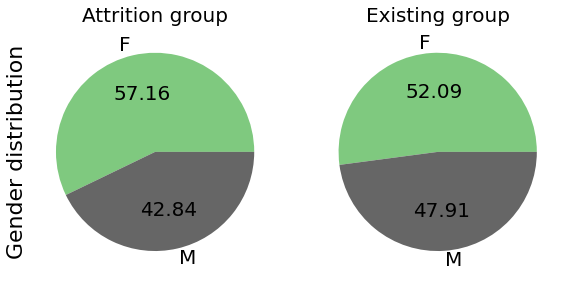

In [54]:
# check whether gender distribution between these two groups are different

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))


attrited.groupby('Gender').size().plot(kind='pie', textprops={'fontsize': 20}, ax=ax1, autopct='%.2f', colormap='Accent')
existing.groupby('Gender').size().plot(kind='pie', textprops={'fontsize': 20}, ax=ax2, autopct='%.2f', colormap='Accent')


ax1.set_title('Attrition group', size=20)
ax1.set_ylabel('Gender distribution', size=22)
ax2.set_title('Existing group', size=20)
ax2.set_ylabel(' ', size=22)


plt.tight_layout()
plt.show()

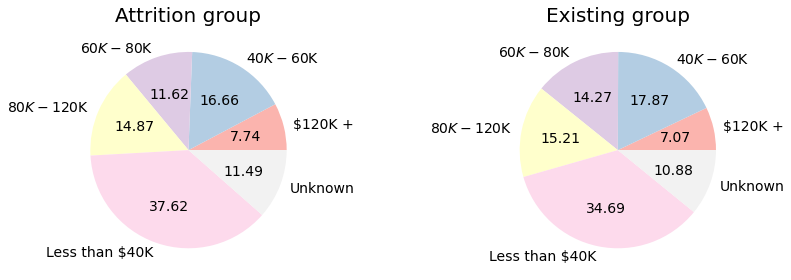

In [62]:
# check whether income distribution are different

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

attrited.groupby('Income_Category').size().plot(kind='pie', textprops={'fontsize': 14}, ax=ax1, autopct='%.2f', colormap='Pastel1')
existing.groupby('Income_Category').size().plot(kind='pie', textprops={'fontsize': 14}, ax=ax2, autopct='%.2f', colormap='Pastel1')

ax1.set_title('Attrition group', size=20)
ax2.set_title('Existing group', size=20)
ax1.set_ylabel(' ', size=22)
ax2.set_ylabel(' ', size=22)


plt.tight_layout()
plt.show()

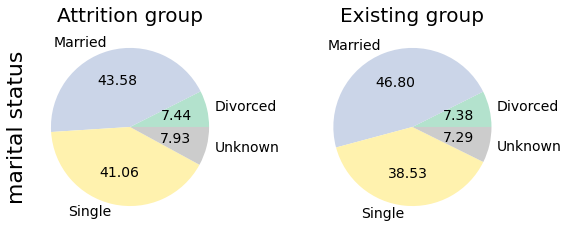

In [60]:
# check marital status

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))

attrited.groupby('Marital_Status').size().plot(kind='pie', textprops={'fontsize': 14}, ax=ax1, autopct='%.2f', colormap='Pastel2')
existing.groupby('Marital_Status').size().plot(kind='pie', textprops={'fontsize': 14}, ax=ax2, autopct='%.2f', colormap='Pastel2')

ax1.set_title('Attrition group', size=20)
ax2.set_title('Existing group', size=20)
ax1.set_ylabel('marital status', size=22)
ax2.set_ylabel(' ', size=22)


plt.tight_layout()
plt.show()

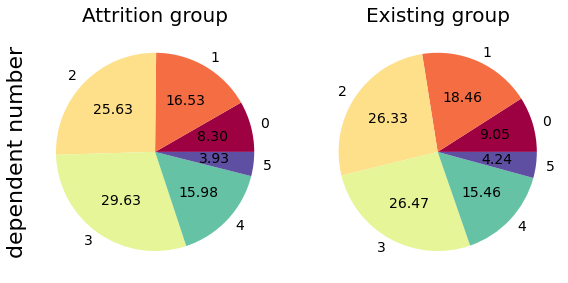

In [59]:
# check dependent number

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))

attrited.groupby('Dependent_count').size().plot(kind='pie', textprops={'fontsize': 14}, ax=ax1, autopct='%.2f', colormap='Spectral')
existing.groupby('Dependent_count').size().plot(kind='pie', textprops={'fontsize': 14}, ax=ax2, autopct='%.2f', colormap='Spectral')

ax1.set_title('Attrition group', size=20)
ax2.set_title('Existing group', size=20)
ax1.set_ylabel('dependent number', size=22)
ax2.set_ylabel(' ', size=22)

plt.tight_layout()
plt.show()

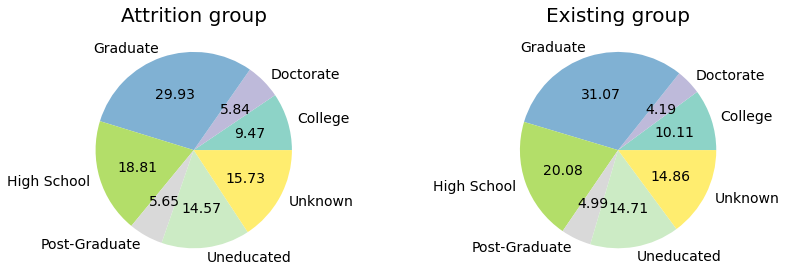

In [65]:
# check education level

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

attrited.groupby('Education_Level').size().plot(kind='pie', textprops={'fontsize': 14}, ax=ax1, autopct='%.2f', colormap='Set3')
existing.groupby('Education_Level').size().plot(kind='pie', textprops={'fontsize': 14}, ax=ax2, autopct='%.2f', colormap='Set3')

ax1.set_title('Attrition group', size=20)
ax2.set_title('Existing group', size=20)
ax1.set_ylabel(' ', size=22)
ax2.set_ylabel(' ', size=22)

plt.tight_layout()
plt.show()

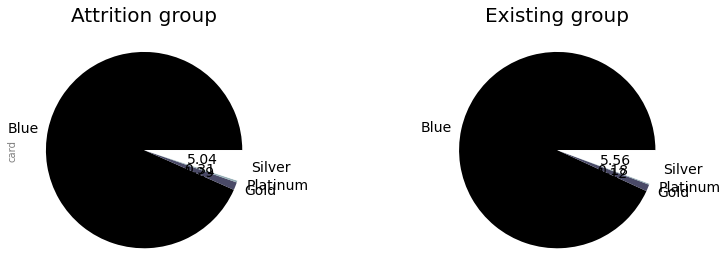

In [81]:
# check card category

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

attrited.groupby('Card_Category').size().plot(kind='pie', textprops={'fontsize': 14}, ax=ax1, autopct='%.2f', colormap='bone')
existing.groupby('Card_Category').size().plot(kind='pie', textprops={'fontsize': 14}, ax=ax2, autopct='%.2f', colormap='bone')

ax1.set_title('Attrition group', size=20)
ax2.set_title('Existing group', size=20)
ax1.set_ylabel('card', size=10, color = 'gray')
ax2.set_ylabel(' ', size=10)

plt.tight_layout()
plt.show()

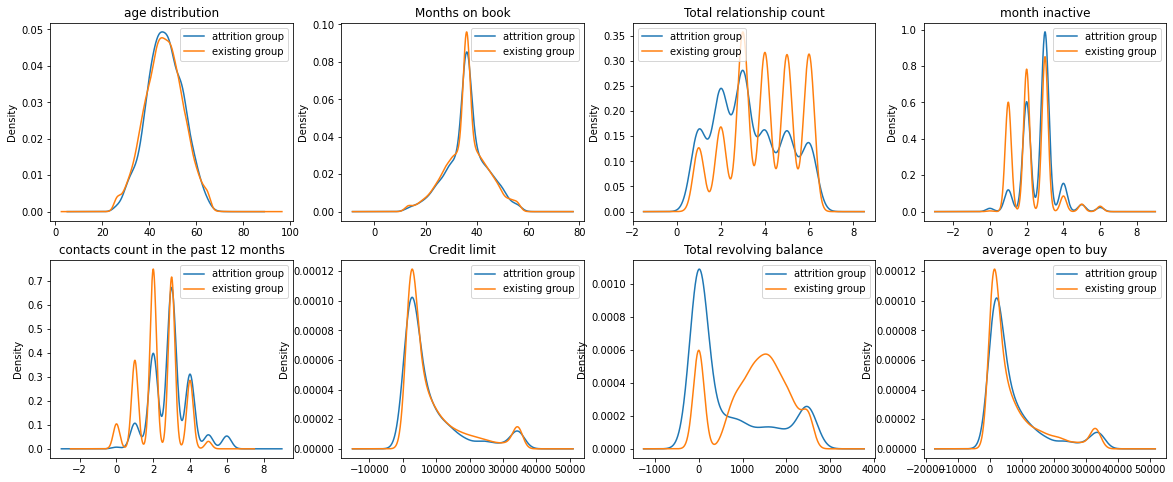

In [91]:
plt.figure(figsize = (20, 8))

plt.subplot(241)

attrited['Customer_Age'].plot.kde(label = 'attrition group')
existing['Customer_Age'].plot.kde(label = 'existing group')
plt.legend()
plt.title('age distribution')

plt.subplot(242)

attrited['Months_on_book'].plot.kde(label = 'attrition group')
existing['Months_on_book'].plot.kde(label = 'existing group')
plt.legend()
plt.title('Months on book')

plt.subplot(243)

attrited['Total_Relationship_Count'].plot.kde(label = 'attrition group')
existing['Total_Relationship_Count'].plot.kde(label = 'existing group')
plt.legend()
plt.title('Total relationship count')

plt.subplot(244)

attrited['Months_Inactive_12_mon'].plot.kde(label = 'attrition group')
existing['Months_Inactive_12_mon'].plot.kde(label = 'existing group')
plt.legend()
plt.title('month inactive')

plt.subplot(245)

attrited['Contacts_Count_12_mon'].plot.kde(label = 'attrition group')
existing['Contacts_Count_12_mon'].plot.kde(label = 'existing group')
plt.legend()
plt.title('contacts count in the past 12 months')

plt.subplot(246)

attrited['Credit_Limit'].plot.kde(label = 'attrition group')
existing['Credit_Limit'].plot.kde(label = 'existing group')
plt.legend()
plt.title('Credit limit')

plt.subplot(247)

attrited['Total_Revolving_Bal'].plot.kde(label = 'attrition group')
existing['Total_Revolving_Bal'].plot.kde(label = 'existing group')
plt.legend()
plt.title('Total revolving balance')

plt.subplot(248)

attrited['Avg_Open_To_Buy'].plot.kde(label = 'attrition group')
existing['Avg_Open_To_Buy'].plot.kde(label = 'existing group')
plt.legend()
plt.title('average open to buy')


plt.show()

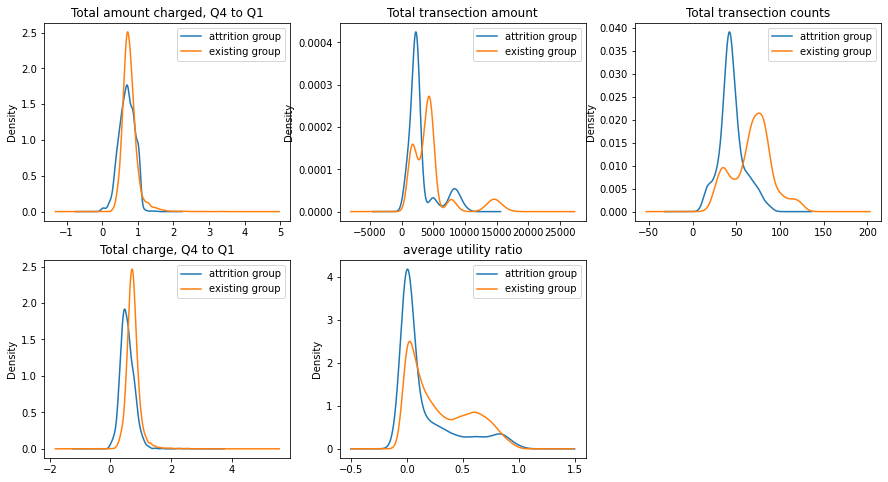

In [93]:
plt.figure(figsize = (15, 8))

plt.subplot(231)
attrited['Total_Amt_Chng_Q4_Q1'].plot.kde(label = 'attrition group')
existing['Total_Amt_Chng_Q4_Q1'].plot.kde(label = 'existing group')
plt.legend()
plt.title('Total amount charged, Q4 to Q1')

plt.subplot(232)
attrited['Total_Trans_Amt'].plot.kde(label = 'attrition group')
existing['Total_Trans_Amt'].plot.kde(label = 'existing group')
plt.legend()
plt.title('Total transection amount')

plt.subplot(233)
attrited['Total_Trans_Ct'].plot.kde(label = 'attrition group')
existing['Total_Trans_Ct'].plot.kde(label = 'existing group')
plt.legend()
plt.title('Total transection counts')

plt.subplot(234)
attrited['Total_Ct_Chng_Q4_Q1'].plot.kde(label = 'attrition group')
existing['Total_Ct_Chng_Q4_Q1'].plot.kde(label = 'existing group')
plt.legend()
plt.title('Total charge, Q4 to Q1')

plt.subplot(235)
attrited['Avg_Utilization_Ratio'].plot.kde(label = 'attrition group')
existing['Avg_Utilization_Ratio'].plot.kde(label = 'existing group')
plt.legend()
plt.title('average utility ratio')

plt.show()

In [94]:
# variable appears to be different in these 2 groups: 
# Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Total_Revolving_Bal, Total_Trans_Amt, Total_Trans_Ct, Avg_Utilization_Ratio

# variables might be different
# Gender, Credit_Limit, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Ct_Chng_Q4_Q1

